In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [4]:
directory = os.getcwd()
print(directory)
df = pd.read_csv("../data/BrentOilPrices.csv")

c:\Users\King Betse\Desktop\kifiya-AIM-W10\notebooks


## Data Cleaning

### Removing Duplicate

In [5]:
df.drop_duplicates(inplace=True)



### Handling Missing Values


In [6]:
missing_values = df.isnull().sum()
missing_values


Date     0
Price    0
dtype: int64

### Drop rows with Negative Prices


In [17]:

df = df[df['Price'] >= 0]


### Handling Outliner

In [8]:
from scipy import stats
df = df[(np.abs(stats.zscore(df['Price'])) < 3)]
upper_limit = df['Price'].quantile(0.95)
lower_limit = df['Price'].quantile(0.05)
df['Price'] = np.where(df['Price'] > upper_limit, upper_limit, df['Price'])
df['Price'] = np.where(df['Price'] < lower_limit, lower_limit, df['Price'])

###  Scale numerical features

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Price']] = scaler.fit_transform(df[['Price']])

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None
              Price
count  9.011000e+03
mean   3.784935e-17
std    1.000055e+00
min   -1.051861e+00
25%   -9.097016e-01
50%   -2.998217e-01
75%    6.849843e-01
max    1.991602e+00


### Visualize Price Trends


C:\Users\King Betse\AppData\Local\Temp\ipykernel_25672\4223071434.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


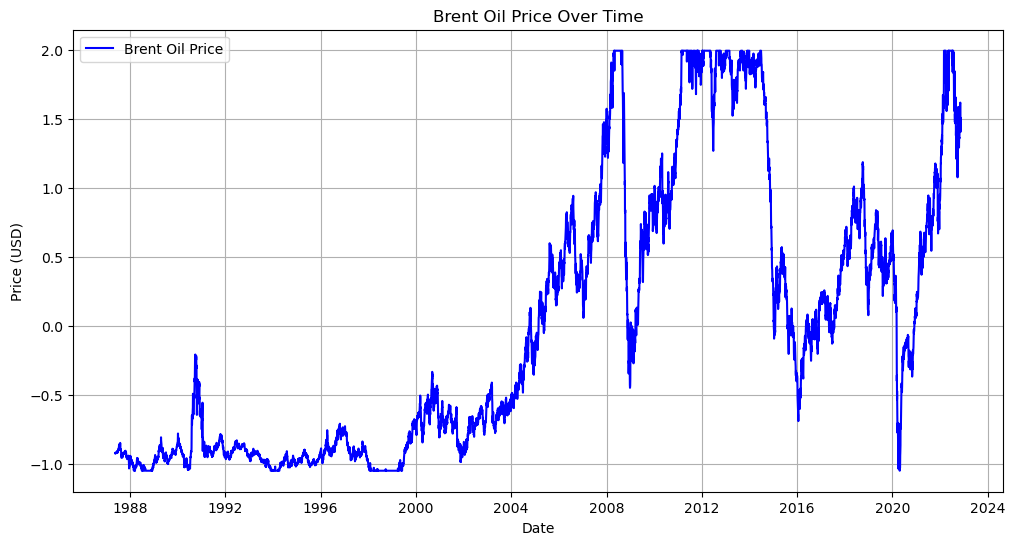

In [10]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime if necessary
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the price trend
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 2: Inspect the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())

# Step 3: Check the unique values in the 'Date' column
print("\nUnique values in 'Date' column:")
# print(df['Date'].unique())

# Step 4: Ensure the 'Date' column is in datetime format
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 5: Check for NaT values in 'Date' column
# print("\nNumber of NaT values in 'Date' column:", df['Date'].isna().sum())

# Step 6: Drop rows with NaT values in the 'Date' column
df = df.dropna(subset=['Date'])

# Step 7: Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Step 8: Ensure the data is at the correct frequency (monthly in this case)
df = df.asfreq('M')  # Adjust to 'D' for daily or 'W' for weekly if needed

# Step 9: Perform seasonal decomposition
decomposition = seasonal_decompose(df['Price'], model='additive')

# Step 10: Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Brent Oil Prices', fontsize=16)
plt.show()

First few rows of the dataset:
               Price
Date                
2004-10-07  0.025427
2004-10-08  0.038862
2004-10-11  0.080728
2004-10-12  0.097288
2004-10-13  0.070418

Unique values in 'Date' column:


KeyError: ['Date']